In [4]:
path='G:/Shared drives/BeStarsMiMeS/ScienceFiles/' #Patrick's google file stream path

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\pjsta\AppData\Local\Temp\ipykernel_18168\3027677816.py:43: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,20000)


(3.302683865249019, 20000)

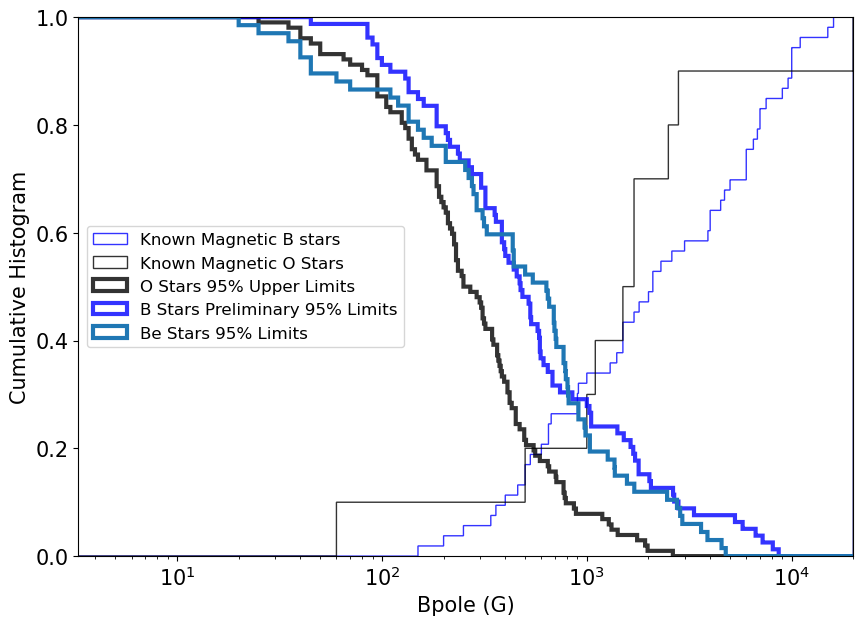

In [11]:
bins=np.arange(0,20000+5,5)

#____________________________________________________________
#95% credible regions for O stars from Petit 2019 paper
Petit2019O=pd.read_csv('{}14-RavenFittingComparisons/Ostars_upperlimits.tsv'.format(path), sep='\t',header=None)

#95% credible regions for preliminary B stars
sheet_id = '1d5_XPFfdn-WQmM59VFjkZMHmiImjC46yeaRz9fulqpU'
sheet_name = 'Sheet1'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
Bstars_prelim=pd.read_csv(url)
Bstars_prelim_B=Bstars_prelim['V_95_UB'].values[np.where(Bstars_prelim['V_95_LB']==0)]

#95% credible regions for preliminary Be stars
hybrid_full_V_upper=pd.read_csv('{}06-RavenCalculations/hybrid_maskdepth0.01_tellClean_UpperLimits.csv'.format(path))
#____________________________________________________________

#____________________________________________________________
#known magnetic O stars from Petit 2013 paper (table 1: https://academic.oup.com/mnras/article/429/1/398/1020653)
Petit2013O=[1000,1700,1100,2500,20000,2800,500,1500,1700,60]

#known magentic B stars from Petit 2013 paper (table 1: https://academic.oup.com/mnras/article/429/1/398/1020653)
Petit2013B=[200,650,460,670,1500,1500,2100,360,1400,250,500,6000,400,6500,2100,16000,1500,4000,910,6000,9600,4700,3900,15000,600,650,1800,530,340,1700,900,1000,6000,900,11000,2600,10000,7000,10000,500,5000,150,9000,2000,7500,3000,6800,7000,4500,4000,21000,2300,1300,10000]
#____________________________________________________________


plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(1,1, figsize=(10,7))


plt.hist(Petit2013B,bins=bins,cumulative=True,histtype='step',density=True,color='b',alpha=0.8,label='Known Magnetic B stars')
plt.hist(Petit2013O,bins=bins,cumulative=True,histtype='step',density=True,color='black',alpha=0.8,label='Known Magnetic O Stars')

plt.hist(Petit2019O[4],bins=bins,cumulative=-1,histtype='step',density=True,color='black',alpha=0.8,label='O Stars 95% Upper Limits',linewidth=3)
plt.hist(Bstars_prelim_B,bins=bins,cumulative=-1,histtype='step',density=True,color='b',alpha=0.8,label='B Stars Preliminary 95% Limits',linewidth=3)
plt.hist(hybrid_full_V_upper['Lower 95.0%'], bins=bins,cumulative=-1, density=True,histtype='step',color='C0',alpha=1,label='Be Stars 95% Limits',linewidth=3)

plt.legend(loc=6,fontsize=12)
plt.xlabel('Bpole (G)')
plt.ylabel('Cumulative Histogram')
plt.xscale('log',base=10)
plt.ylim(0,1.0)
plt.xlim(0,20000)